# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,65,89,41,75,143,56,7,146,46,19,137,170,317,156,76,18,5,184,188
1,549,107,51,103,182,56,11,213,31,24,162,226,673,217,72,2,4,188,198
2,240,89,36,77,172,62,8,157,42,19,125,174,367,126,63,5,22,198,205
3,432,84,38,83,141,54,7,149,45,19,132,177,327,149,74,6,29,185,191
4,325,82,44,63,123,54,7,151,45,19,147,166,329,185,81,3,4,179,182
5,272,91,43,88,157,61,9,149,45,19,157,165,326,140,64,1,26,197,207
6,736,102,51,104,217,67,10,204,32,23,162,220,621,195,68,3,19,188,197
7,262,89,40,60,131,56,6,118,56,17,137,143,209,153,65,10,8,193,199
8,511,88,38,77,156,56,7,163,41,20,129,184,395,140,67,1,9,192,198
9,565,101,48,85,191,60,11,175,38,21,153,192,458,187,62,5,22,197,210


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,426.091075,93.759563,44.994536,82.069217,169.238616,61.677596,8.601093,169.515483,40.770492,20.635701,148.335155,188.979964,443.595628,175.726776,72.411658,6.466302,12.546448,188.990893,195.606557
std,247.402342,8.418812,6.189375,15.942264,32.718545,7.143975,4.620179,33.583351,7.808974,2.617020,14.452940,31.258131,179.270074,33.039321,7.323466,4.890522,9.126450,6.280103,7.614936
min,1.000000,73.000000,33.000000,47.000000,104.000000,48.000000,3.000000,114.000000,26.000000,17.000000,118.000000,134.000000,193.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,216.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,167.000000,320.000000,150.000000,67.000000,3.000000,5.000000,184.000000,190.000000
50%,421.000000,93.000000,44.000000,79.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,174.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,646.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,598.000000,199.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,252.000000,126.000000,55.000000,265.000000,59.000000,29.000000,188.000000,288.000000,1018.000000,264.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE
from scipy.stats import zscore

X_train_normalized = zscore(X_train)  # data normalization 
X_test_normalized  = zscore(X_test)

In [7]:
X_train_normalized_pd = pd.DataFrame(X_train_normalized)
X_train_normalized_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,-9.383306e-17,-6.471245e-17,-9.706868e-17,2.264936e-16,-3.640075e-16,-4.756365e-16,-3.397404e-17,9.383306e-17,9.706868e-17,-8.089057e-17,1.682524e-16,2.847348e-16,-2.912060e-17,2.912060e-16,-3.300335e-16,-2.264936e-17,4.206309e-17,-5.662340e-16,1.226301e-15
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.719785e+00,-2.468103e+00,-1.939691e+00,-2.201770e+00,-1.995752e+00,-1.916310e+00,-1.213416e+00,-1.654573e+00,-1.893202e+00,-1.390519e+00,-2.100806e+00,-1.760505e+00,-1.399141e+00,-2.021459e+00,-1.696325e+00,-1.323417e+00,-1.375989e+00,-2.070466e+00,-1.919895e+00
25%,-8.499624e-01,-8.036440e-01,-8.076890e-01,-7.577483e-01,-8.638639e-01,-6.553581e-01,-3.468595e-01,-6.710473e-01,-9.959795e-01,-6.255943e-01,-7.157423e-01,-7.038172e-01,-6.900669e-01,-7.793816e-01,-7.396215e-01,-7.094261e-01,-8.276307e-01,-7.954398e-01,-7.369294e-01
50%,-2.059689e-02,-9.030438e-02,-1.608309e-01,-1.926963e-01,-7.299630e-03,-9.493505e-02,-1.302203e-01,-3.730091e-01,2.857663e-01,-2.431319e-01,-1.617169e-01,-3.195669e-01,-4.332368e-01,-5.231193e-02,-5.626202e-02,-9.543514e-02,-1.696014e-01,1.451532e-03,1.831550e-01
75%,8.896823e-01,7.419252e-01,8.094564e-01,1.000191e+00,7.880815e-01,4.654880e-01,3.030581e-01,9.085549e-01,6.702900e-01,9.042554e-01,8.078276e-01,8.972254e-01,8.620802e-01,7.050523e-01,4.904256e-01,5.185558e-01,7.077711e-01,6.389646e-01,7.089175e-01
max,1.694774e+00,3.000834e+00,2.264887e+00,1.879161e+00,2.531802e+00,9.011939e+00,1.005182e+01,2.845803e+00,2.336560e+00,3.199030e+00,2.746917e+00,3.170706e+00,3.207051e+00,2.674199e+00,7.460693e+00,3.179183e+00,3.120545e+00,2.710882e+00,2.023324e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
### YOUR CODE HERE
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

warnings.filterwarnings('ignore')
random_state = 100

default_log_reg_params = {
    "multi_class": "multinomial", 
    "solver": "saga", 
    "tol": 1e-3, 
    "max_iter": 500, 
    "random_state": random_state,
}

log_reg = LogisticRegression(default_log_reg_params)

params_search_grid = {
    "penalty": ["l1", "l2"],
    "C": np.arange(0.0, 100.0, 0.1),
}

grid_search = GridSearchCV(log_reg, params_search_grid, scoring="accuracy", cv=10)
grid_search.fit(X_train_normalized, y_train)

best_found_log_reg_params = grid_search.best_params_
print("Best params for log_reg:", best_found_log_reg_params)

Best params for log_reg: {'C': 78.4, 'penalty': 'l2'}


In [9]:
from sklearn.metrics import accuracy_score, f1_score

best_log_reg = LogisticRegression(default_log_reg_params.update(best_found_log_reg_params))
best_log_reg.fit(X_train_normalized, y_train)

y_pred_train = best_log_reg.predict(X_train_normalized)
y_pred_test = best_log_reg.predict(X_test_normalized)

print("Accuracy train:", accuracy_score(y_train, y_pred_train))
print("Accuracy test:", accuracy_score(y_test, y_pred_test))
print("\nF1-score weighted train:", f1_score(y_train, y_pred_train, average="weighted"))
print("F1-score weighted test:", f1_score(y_test, y_pred_test, average="weighted"))
print("\nF1-score per-class train:", f1_score(y_train, y_pred_train, average=None))
print("F1-score per-class test:", f1_score(y_test, y_pred_test, average=None))

Accuracy train: 0.8688524590163934
Accuracy test: 0.7744107744107744

F1-score weighted train: 0.8684133673315808
F1-score weighted test: 0.7719882766566551

F1-score per-class train: [0.98039216 0.75812274 0.74349442 0.99186992]
F1-score per-class test: [0.92753623 0.61437908 0.61842105 0.95364238]


Благодаря метрике f1-score per-class можно увидеть, что 1й и 4й классы определяются лучше всего. По дальнейшим исследованиям станет понятно, что это достигается благодаря данным, по которым 1 и 4 классы легче всего предсказать.

In [10]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

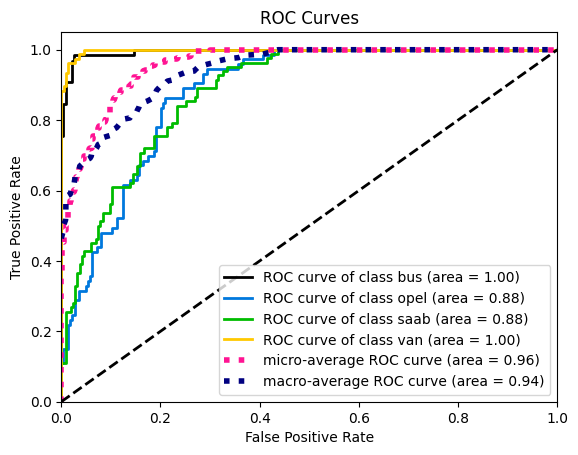

In [11]:
from scikitplot.metrics import plot_roc

probs = best_log_reg.predict_proba(X_test_normalized)
plot_roc(y_test, probs)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

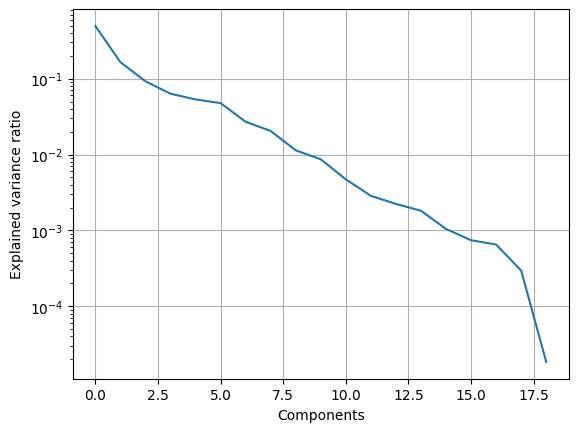

In [12]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA()
pca.fit(X_train_normalized)
explained_variance_ratio = pca.explained_variance_ratio_

plt.plot(explained_variance_ratio)
plt.yscale('log')
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.grid(True)
plt.show()

`pca.explained_variance_ratio_` - доля дисперсии, вносимая компонентами. Судя по графику, можно взять до 15 компонент до значительной просадки по дисперсии.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Взятие меньшего кол-ва компонент позволяет понизить размерность задачи. В данном случае компоненты до 15 несут больше всего информации.

In [13]:
### YOUR CODE HERE
pca = PCA(n_components=15, random_state=random_state)
pca.fit(X_train_normalized)

X_train_pca = pca.transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [14]:
### YOUR CODE HERE
log_reg_pca = LogisticRegression(default_log_reg_params)

grid_search_pca = GridSearchCV(log_reg_pca, params_search_grid)
grid_search_pca.fit(X_train_pca, y_train)

best_found_log_reg_params_pca = grid_search_pca.best_params_
print("Best params for PCA log_reg:", best_found_log_reg_params_pca)

Best params for PCA log_reg: {'C': 88.10000000000001, 'penalty': 'l2'}


In [15]:
best_log_reg_pca = LogisticRegression(default_log_reg_params.update(best_found_log_reg_params_pca))
best_log_reg_pca.fit(X_train_pca, y_train)

y_pred_train_pca = best_log_reg_pca.predict(X_train_pca)
y_pred_test_pca = best_log_reg_pca.predict(X_test_pca)

print("Accuracy train:", accuracy_score(y_train, y_pred_train_pca))
print("Accuracy test:", accuracy_score(y_test, y_pred_test_pca))
print("\nF1-score weighted train:", f1_score(y_train, y_pred_train_pca, average="weighted"))
print("F1-score weighted test:", f1_score(y_test, y_pred_test_pca, average="weighted"))
print("\nF1-score per-class train:", f1_score(y_train, y_pred_train_pca, average=None))
print("F1-score per-class test:", f1_score(y_test, y_pred_test_pca, average=None))

Accuracy train: 0.843351548269581
Accuracy test: 0.7508417508417509

F1-score weighted train: 0.8423399659559566
F1-score weighted test: 0.7470277064792413

F1-score per-class train: [0.97068404 0.70588235 0.70588235 0.98785425]
F1-score per-class test: [0.92753623 0.58823529 0.56953642 0.93421053]


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

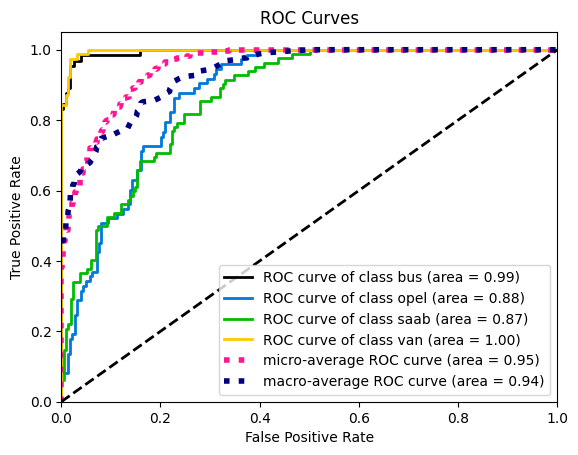

In [16]:
probs_pca = best_log_reg_pca.predict_proba(X_test_pca)
plot_roc(y_test, probs_pca)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [17]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
decision_tree = DecisionTreeClassifier(random_state=random_state)

param_search_grid = {
    "max_depth": np.arange(1, 100),
    "criterion": ["gini", "entropy", "log_loss"],
    "min_samples_split": np.arange(2, 11),
}

grid_search_decision_tree = GridSearchCV(decision_tree, param_search_grid, scoring="accuracy", cv=10)
grid_search_decision_tree.fit(X_train_pca, y_train)

best_found_dec_tree_params = grid_search_decision_tree.best_params_
print("Best params for decision tree:", best_found_dec_tree_params)

Best params for decision tree: {'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 2}


In [18]:
best_dec_tree = DecisionTreeClassifier(**best_found_dec_tree_params, random_state=random_state)
best_dec_tree.fit(X_train_pca, y_train)

y_pred_train = best_dec_tree.predict(X_train_pca)
y_pred_test = best_dec_tree.predict(X_test_pca)

print("Accuracy train:", accuracy_score(y_train, y_pred_train))
print("Accuracy test:", accuracy_score(y_test, y_pred_test))
print("\nF1-score weighted train:", f1_score(y_train, y_pred_train, average="weighted"))
print("F1-score weighted test:", f1_score(y_test, y_pred_test, average="weighted"))
print("\nF1-score per-class train:", f1_score(y_train, y_pred_train, average=None))
print("F1-score per-class test:", f1_score(y_test, y_pred_test, average=None))

Accuracy train: 1.0
Accuracy test: 0.6801346801346801

F1-score weighted train: 1.0
F1-score weighted test: 0.6788215654509837

F1-score per-class train: [1. 1. 1. 1.]
F1-score per-class test: [0.84285714 0.49655172 0.57668712 0.82191781]


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

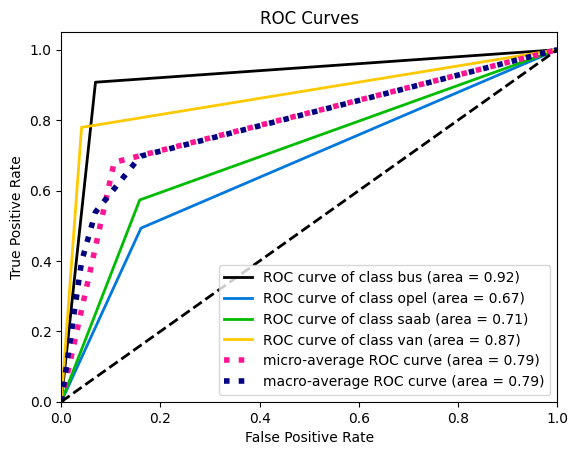

In [19]:
probs_pca = best_dec_tree.predict_proba(X_test_pca)
plot_roc(y_test, probs_pca)

Точность предсказания решающим деревом хуже, чем логистической регрессией, скорость работы двух алгоритмов на данном датасете практически одинаковая, поэтому ее тяжело сравнить.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [20]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(random_state=random_state)
num_ests = list(i for i in range(5, 105, 5))

param_search_grid = {
    "n_estimators": num_ests,
    "estimator": [best_log_reg, best_dec_tree],
}

grid_search_bagging = GridSearchCV(bag_clf, param_search_grid, scoring=["accuracy", "f1_weighted"], refit="f1_weighted")
grid_search_bagging.fit(X_train_normalized, y_train)

best_found_bagging_params = grid_search_bagging.best_params_
print("Best params for bagging:", best_found_bagging_params)

Best params for bagging: {'estimator': LogisticRegression(penalty=None), 'n_estimators': 65}


In [21]:
print(grid_search_bagging.cv_results_["mean_test_accuracy"])
print(grid_search_bagging.cv_results_["mean_test_f1_weighted"])
print(grid_search_bagging.cv_results_["param_n_estimators"])

grid_search_bagging.cv_results_["param_estimator"][0]  # элементы под индексами с 0 по 19 относятся к logisctic regresiion

[0.81059216 0.82333611 0.82151793 0.82151793 0.82151793 0.82151793
 0.82335279 0.82517098 0.82333611 0.8251543  0.82151793 0.8251543
 0.82697248 0.8251543  0.82333611 0.8251543  0.82151793 0.82151793
 0.81786489 0.81786489 0.70857381 0.73221018 0.73769808 0.74135113
 0.74503753 0.74502085 0.75778148 0.75232694 0.75052544 0.75232694
 0.75052544 0.75779817 0.74503753 0.74870726 0.75054212 0.74690575
 0.7523603  0.74323603 0.73778148 0.74508757]
[0.80562204 0.81731637 0.81609262 0.81564896 0.81574937 0.81709152
 0.81883659 0.82085396 0.81862366 0.82064102 0.81733088 0.82064167
 0.82241966 0.82088752 0.81885114 0.82064167 0.81733088 0.81733088
 0.81356055 0.81356055 0.70645044 0.72959165 0.73358867 0.73577461
 0.7396889  0.73773997 0.75153916 0.74596941 0.74270573 0.74551492
 0.7446832  0.75065425 0.73768556 0.74165558 0.74433409 0.74083985
 0.74570235 0.73720145 0.7313278  0.73854353]
[5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 5 10 15 20 25
 30 35 40 45 50 55 60 65 70 75

LogisticRegression(penalty=None)

In [22]:
grid_search_bagging.cv_results_["param_estimator"][20]  # элементы под индексами с 20 по 39 относятся к decision tree

DecisionTreeClassifier(max_depth=13, random_state=100)

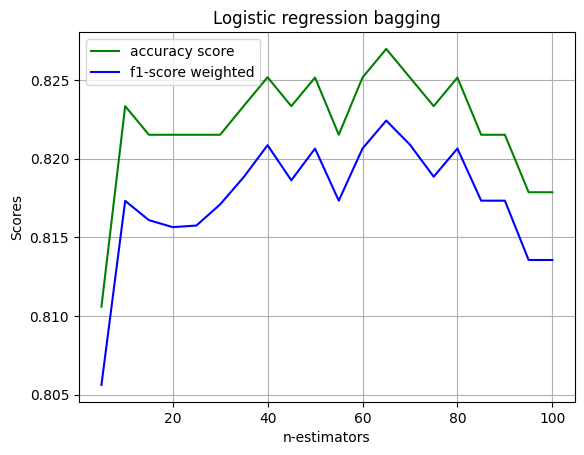

In [23]:
plt.plot(
    grid_search_bagging.cv_results_["param_n_estimators"][:len(num_ests)],
    grid_search_bagging.cv_results_["mean_test_accuracy"][:len(num_ests)],
    label="accuracy score",
    color="green",
)
plt.plot(
    grid_search_bagging.cv_results_["param_n_estimators"][:len(num_ests)],
    grid_search_bagging.cv_results_["mean_test_f1_weighted"][:len(num_ests)],
    label="f1-score weighted",
    color="blue",
)
plt.legend()
plt.title("Logistic regression bagging")
plt.xlabel("n-estimators")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

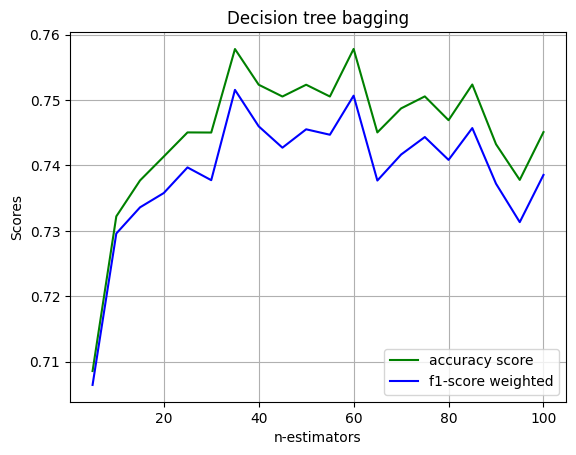

In [24]:
plt.plot(
    grid_search_bagging.cv_results_["param_n_estimators"][len(num_ests):],
    grid_search_bagging.cv_results_["mean_test_accuracy"][len(num_ests):],
    label="accuracy score",
    color="green",
)
plt.plot(
    grid_search_bagging.cv_results_["param_n_estimators"][len(num_ests):],
    grid_search_bagging.cv_results_["mean_test_f1_weighted"][len(num_ests):],
    label="f1-score weighted",
    color="blue",
)
plt.legend()
plt.title("Decision tree bagging")
plt.xlabel("n-estimators")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

По графикам видно, что оба вида моделей багинга дают приблизительно одинаковую динамику метрик точности и f1-score, по точности немного лучше в абсолютном выражении (примерно на одну сотую). Баггинг на логистической регресии дает большую точность, чем на решающих деревьях.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [25]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE\
random_forest = RandomForestClassifier(random_state=random_state)
param_search_grid = {"n_estimators": num_ests}

grid_search_random_forest = GridSearchCV(random_forest, param_grid=param_search_grid, scoring=["accuracy", "f1_weighted"], refit="f1_weighted")
grid_search_random_forest.fit(X_train, y_train)

best_found_rand_forest_params = grid_search_random_forest.best_params_
print("Best params for random forest:", best_found_rand_forest_params)

Best params for random forest: {'n_estimators': 95}


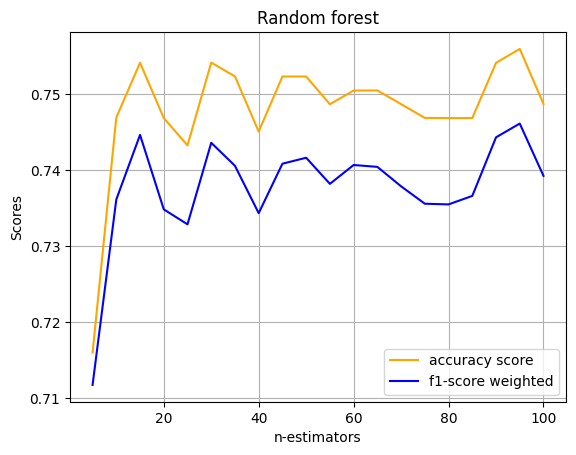

In [26]:
plt.plot(
    grid_search_random_forest.cv_results_["param_n_estimators"],
    grid_search_random_forest.cv_results_["mean_test_accuracy"],
    label="accuracy score",
    color="orange",
)
plt.plot(
    grid_search_random_forest.cv_results_["param_n_estimators"],
    grid_search_random_forest.cv_results_["mean_test_f1_weighted"],
    label="f1-score weighted",
    color="blue",
)
plt.legend()
plt.title("Random forest")
plt.xlabel("n-estimators")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

Наибольшая точность предсказания модели случайного леса достигается в районе 95 деревьев (при фиксированном random state). Величина точности предсказания сопоставила с беггингом и другими моделями.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [27]:
# YOUR CODE HERE
num_splits = 10
indices = [0]

for i in range(num_splits):
    indices.append(
        indices[-1] + X_train_pca.shape[0] // num_splits + 1
    ) if i < X_train_pca.shape[0] % num_splits else indices.append(
        indices[-1] + X_train_pca.shape[0] // num_splits
    )


def get_scores(model, num_splits):
    f1_score_model, accuracy_model = [], []
    for i in range(num_splits):
        model.fit(X_train_pca[indices[0]: indices[i + 1], :], y_train[indices[0]: indices[i + 1]])
        y_pred = model.predict(X_test_pca[indices[0]: indices[i + 1], :])
        f1_score_model.append(f1_score(y_test[indices[0]: indices[i + 1]], y_pred, average="weighted"))
        accuracy_model.append(accuracy_score(y_test[indices[0]: indices[i + 1]], y_pred))
    return f1_score_model, accuracy_model


f1_score_log_reg, accuracy_log_reg = get_scores(best_log_reg_pca, num_splits)
f1_scores_dec_tree, accuracies_dec_tree = get_scores(best_dec_tree, num_splits)
f1_scores_rand_forest, accuracies_rand_forest = get_scores(random_forest, num_splits)


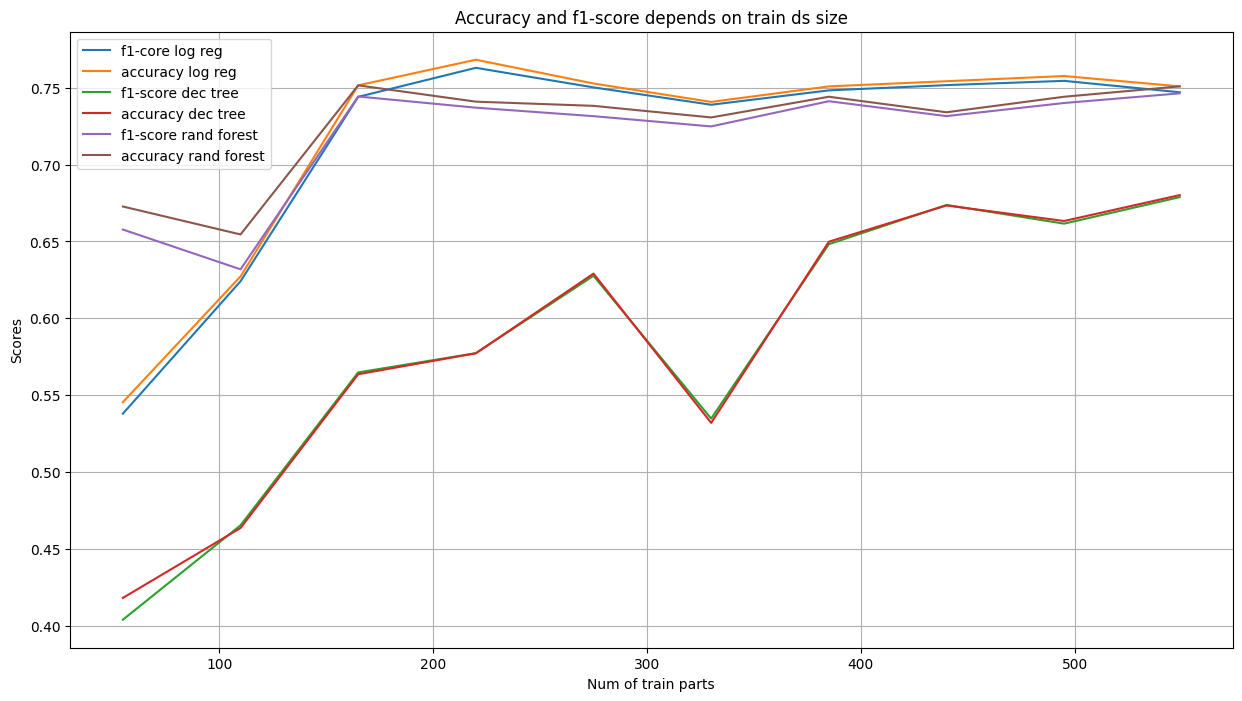

In [28]:
plt.figure(figsize=(15, 8))
plt.plot(indices[1:], f1_score_log_reg, label='f1-core log reg')
plt.plot(indices[1:], accuracy_log_reg, label='accuracy log reg')
plt.plot(indices[1:], f1_scores_dec_tree, label='f1-score dec tree')
plt.plot(indices[1:], accuracies_dec_tree, label='accuracy dec tree')
plt.plot(indices[1:], f1_scores_rand_forest, label='f1-score rand forest')
plt.plot(indices[1:], accuracies_rand_forest, label='accuracy rand forest')

plt.xlabel('Num of train parts')
plt.ylabel('Scores')
plt.title('Accuracy and f1-score depends on train ds size')
plt.legend()
plt.grid(True)
plt.show()

Случайный лес показывает неплохие результаты уже на самом маленьком размере выборки. С увеличением размера тренировочных данных точность примерно константная.

Точность рещаюшего дерева сильно зависит от размера обучающей выборки, максимум достигается при наибольшем размере.

Для логистической регрессии видно, что в начале ей не хватает тренировочных данных, но затем (после 200) при увеличении размера выборки точность особенно не меняется.

Отсюда можно считать, что некоторые модели (например, случайный лес) можно применять даже на неполном размере выборки, что даст идентичные результаты по точности и f1-score, однако будет обрабатывать меньший обьем данных.